### Stationarity of time-series

Main resources used: 
1. [Stochastic process charecteristics - MATLAB Help](https://in.mathworks.com/help/econ/stationary-stochastic-process.html)
1. [How to Check if Time Series Data is Stationary with Python - machinelearningmastery.com](https://machinelearningmastery.com/time-series-data-stationary-python/)
1. [Time Series Analysis in Python – A Comprehensive Guide with Examples](https://www.machinelearningplus.com/time-series/time-series-analysis-python/)

### What is a time-series?

Observations made at equally spaced time-stamps create a time-series

### What is a time-series?

In [113]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc
from GPy.kern import RBF, Matern32, Matern52, Exponential, ExpQuad

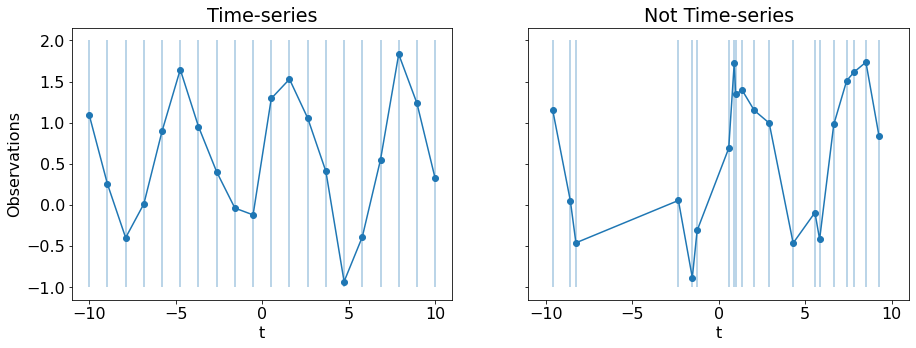

In [114]:
N = 20
l,h=-10,10
np.random.seed(0)
xs = np.linspace(l,h,N)
ys = np.sin(xs) + np.random.rand(N)
np.random.seed(0)
xns = np.sort(np.random.uniform(l,h,N))
yns = np.sin(xns) + np.random.rand(N)

rc('font', size=16)
# rc('text', usetex=True)
fig, ax = plt.subplots(1,2,sharey=True,sharex=True, figsize=(15,5))
ax[0].plot(xs, ys,'o-')
for i in range(N):
    ax[0].vlines(xs[i], -1, 2, alpha=0.4)
    ax[1].vlines(xns[i],-1, 2, alpha=0.4)
ax[1].plot(xns, yns, 'o-');
ax[0].set_xlabel('t');ax[1].set_xlabel('t');
ax[0].set_ylabel('Observations');

ax[0].set_title('Time-series')
ax[1].set_title('Not Time-series');

### What is a stochastic process?

A joint probability distribution for a collection of random variables

example $\to$ Gaussian process

### Connection between time-series and stochastic process

A time-series can be treated as a realization (sample) of stochastic process. 

| Stochastic process | Time-series |
| :-- | :-- |
| Variable | Time-stamp |
| Sample | Observations |

Example $\to$ A Time-series with 8 time-stamps is a sample taken from joint probability distribution of a stochastic process with 8 variables.

### Stationary time-series process
First moment ($\mathbb{E}$) and second moment ($V$) should be constant over time

For all $t$,
* $\mathbb{E}(y_t) = \mu $ Constant
* $V(y_t) = \sigma^2 $ Constant
* $Cov(y_t, y_{t+h}) = \gamma $ Constant

### Why stationarity is important?

* Autoregressive models for modeling and prediction works best with stationary time-series

### How to check for stationarity?

1. Visually
1. Global v/s local test
1. Statistical test (Augmented Dickey-Fuller test or Unit root test)

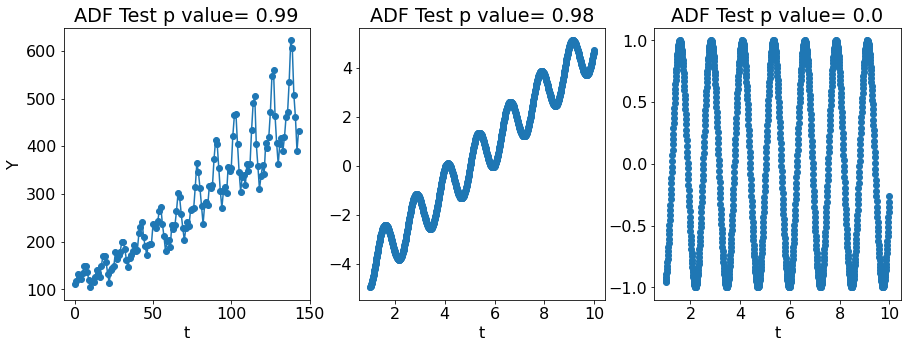

In [115]:
import pandas as pd
fig, ax = plt.subplots(1,3,figsize=(15,5))
x = np.linspace(1,10,1000)
y1 = pd.read_csv('../data/international-airline-passengers.csv').values[:,1]
y2 = np.sin(x*5)+x-5
y3 = np.sin(x*5)
ax[0].plot(y1,'o-');
ax[1].plot(x,y2,'o-');
ax[2].plot(x,y3,'o-');
for each in ax[::-1]:
    each.set_xlabel('t')

ax[0].set_title(f'ADF Test p value= {np.round(adfuller(y1[:-1])[1],2)}')
ax[1].set_title(f'ADF Test p value= {np.round(adfuller(y2[:-1])[1],2)}')
ax[2].set_title(f'ADF Test p value= {np.round(adfuller(y3[:-1])[1],2)}')
each.set_ylabel('Y');

### Linear time-series model
$$
X_t = \sum\limits_{i=1}^{p}\phi_iX_{t-i} + \epsilon_t
$$

### Characteristic equation and unit root

AutoRegressive(1) model
\begin{align}
X_t - \phi_1X_{t-1} &= a_t \\
(1-\phi_1B)X_t &= a_t \\
\text{Char. eq.}\\
1 - \phi_1Z &= 0
\end{align}

### Characteristic equation and unit root

AutoRegressive(2) model
\begin{align}
X_t - \phi_1X_{t-1} - \phi_2X_{t-2}&= a_t \\
X_t- \phi_1 BX_t -\phi_2 B^2 X_t &=   a_t \\
X_t\left[ 1 - \phi_1 B - \phi_2 B^2  \right] &= a_t \\
\text{Char. eq.}\\
1 - \phi_1 Z - \phi_2 Z^2 &= 0
\end{align}

### Stationarity

if all roots are outside unit circle, we call the process as stationary

### How to convert non-stationary Time-series to stationary?

1. Remove known trends
1. Apply log transform
1. Take difference series

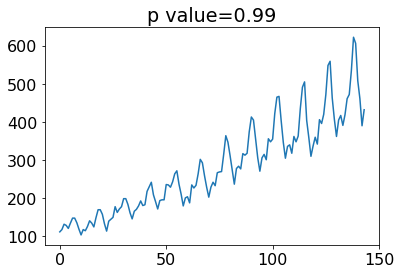

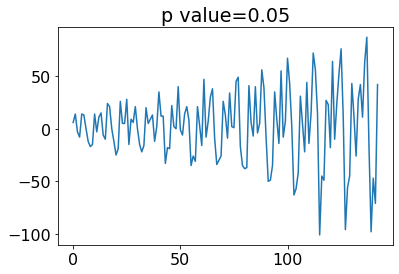

In [117]:
plt.plot(y1);
plt.title(f'p value={np.round(adfuller(y1[:-1])[1], 2)}')
plt.figure();
y11 = y1[:-1]
y11 = y11[1:] - y11[:-1]
plt.plot(y11);
plt.title(f'p value={np.round(adfuller(y11)[1], 2)}');